In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')
print("Libraries imported successfully!")

Libraries imported successfully!


In [17]:
crop_data = pd.read_csv('crop.csv')
fertilizer_data = pd.read_csv('fertiliser.csv')

print("Crop dataset shape:", crop_data.shape)
print("Fertilizer dataset shape:", fertilizer_data.shape)

# Display the first few rows of each dataset
print("\\nCrop dataset preview:")
display(crop_data.head())

print("\\nFertilizer dataset preview:")
display(fertilizer_data.head())

Crop dataset shape: (99, 9)
Fertilizer dataset shape: (2200, 8)
\nCrop dataset preview:


,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


\nFertilizer dataset preview:


,N,P,K,Temperature,Humidity,Ph,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [18]:
print("Missing values in crop dataset:")
print(crop_data.isnull().sum())

print("\\nMissing values in fertilizer dataset:")
print(fertilizer_data.isnull().sum())

# Get basic statistics
print("\\nCrop dataset info:")
crop_data.info()

print("\\nFertilizer dataset info:")
fertilizer_data.info()

Missing values in crop dataset:
Temperature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64
\nMissing values in fertilizer dataset:
N              0
P              0
K              0
Temperature    0
Humidity       0
Ph             0
Rainfall       0
Label          0
dtype: int64
\nCrop dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temperature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8  

In [19]:
print("Unique crop types:", crop_data['Crop Type'].nunique())
print(crop_data['Crop Type'].unique())

print("\\nUnique soil types:", crop_data['Soil Type'].nunique())
print(crop_data['Soil Type'].unique())

print("\\nUnique fertilizer names:", crop_data['Fertilizer Name'].nunique())
print(crop_data['Fertilizer Name'].unique())

Unique crop types: 11
['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
\nUnique soil types: 5
['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
\nUnique fertilizer names: 7
['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


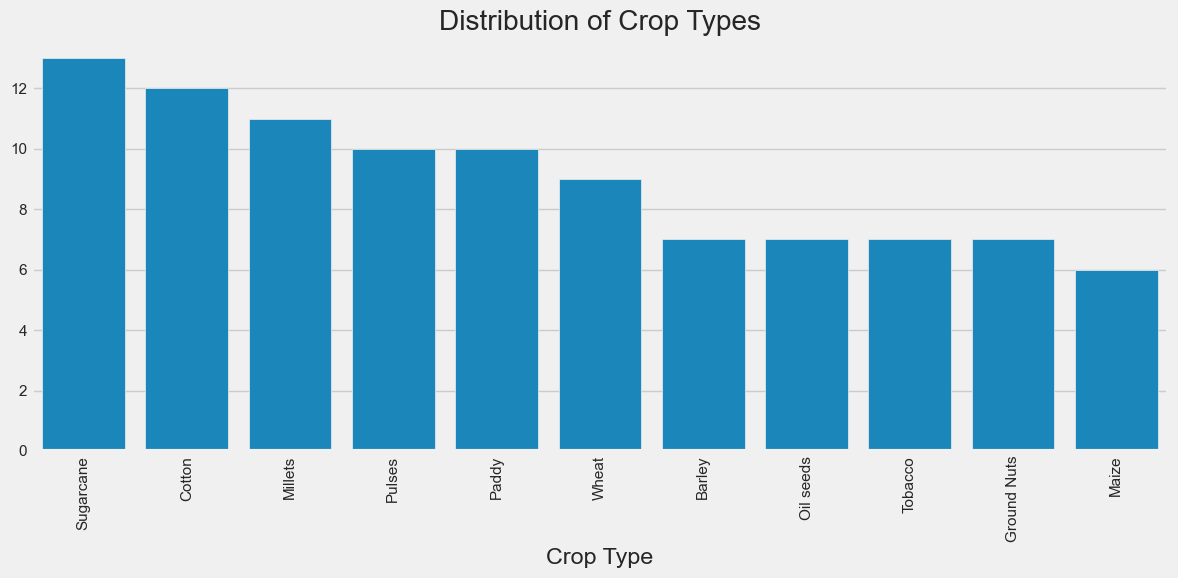

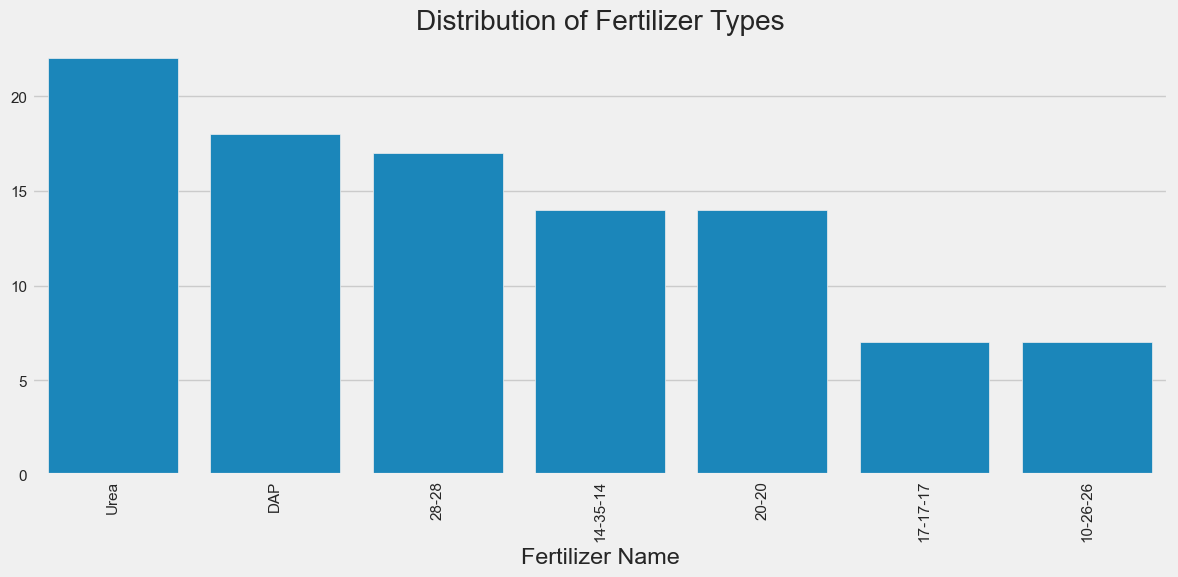

In [20]:
plt.figure(figsize=(12, 6))
crop_counts = crop_data['Crop Type'].value_counts()
sns.barplot(x=crop_counts.index, y=crop_counts.values)
plt.title('Distribution of Crop Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize fertilizer distribution
plt.figure(figsize=(12, 6))
fertilizer_counts = crop_data['Fertilizer Name'].value_counts()
sns.barplot(x=fertilizer_counts.index, y=fertilizer_counts.values)
plt.title('Distribution of Fertilizer Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

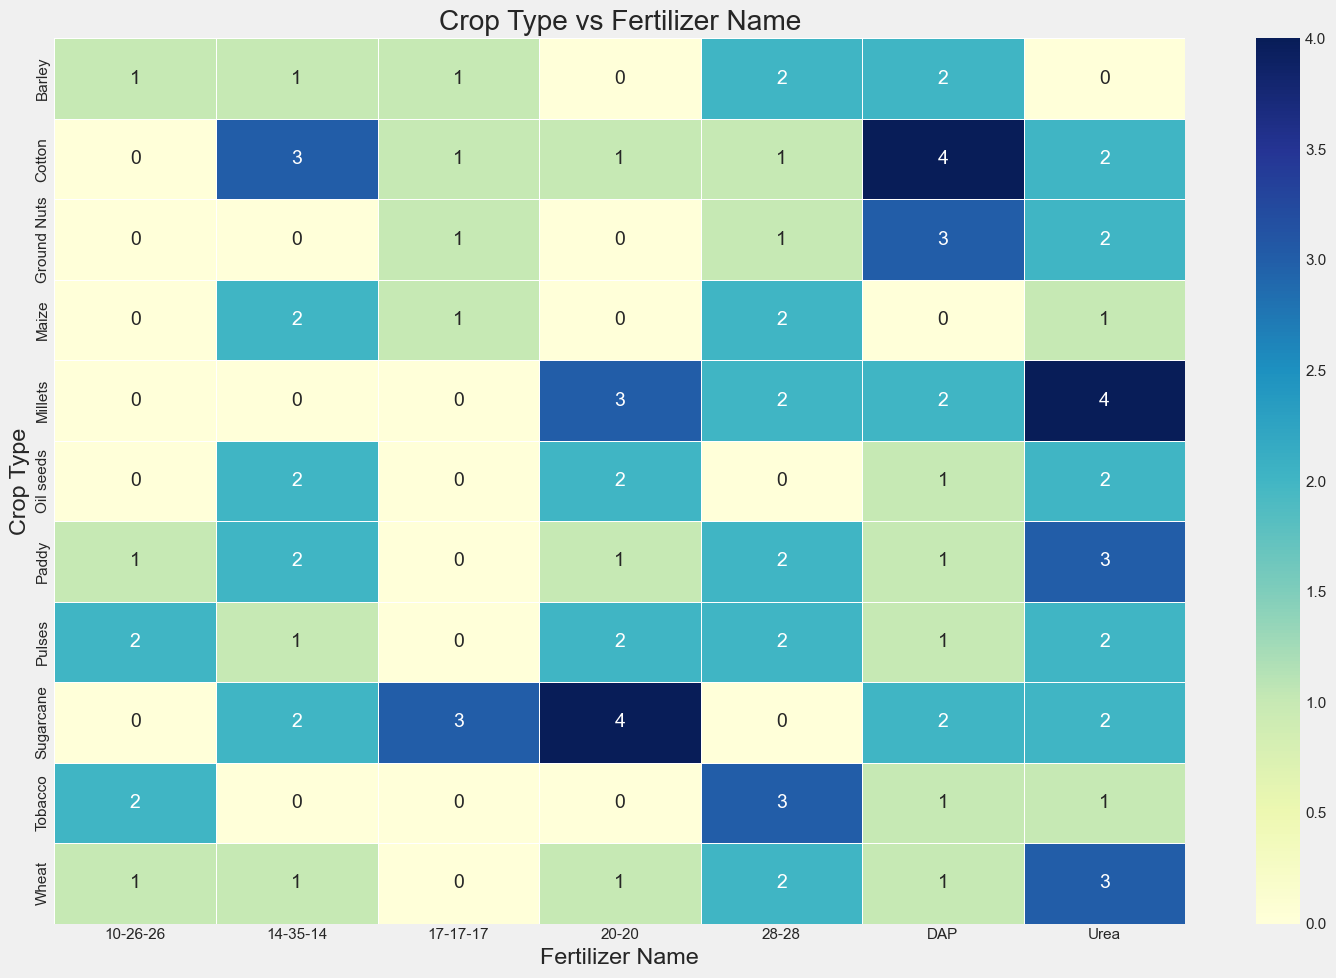

In [21]:
plt.figure(figsize=(15, 10))
crop_fertilizer = pd.crosstab(crop_data['Crop Type'], crop_data['Fertilizer Name'])
sns.heatmap(crop_fertilizer, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Crop Type vs Fertilizer Name')
plt.tight_layout()
plt.show()

In [22]:
# Convert categorical variables to numerical
label_encoders = {}

# Create a copy of the dataset for preprocessing
df = crop_data.copy()

# Encode categorical variables
categorical_cols = ['Soil Type', 'Crop Type', 'Fertilizer Name']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle any missing values after conversion
df = df.fillna(df.mean())

print("Preprocessed data:")
display(df.head())
    
# Define features and target
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Preprocessed data:


,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


Training set shape: (79, 8)
Testing set shape: (20, 8)


In [23]:
# Define features and target
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



In [24]:
# Save the model
with open('fertilizer_prediction_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save the label encoders and scaler
with open('preprocessing_objects.pkl', 'wb') as file:
    pickle.dump({
        'label_encoders': label_encoders,
        'scaler': scaler
    }, file)

print("Model and preprocessing objects saved to pickle files!")

Model and preprocessing objects saved to pickle files!


In [28]:
def load_model_and_preprocessing():
    # Load the saved model
    with open('fertilizer_prediction_model.pkl', 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    
    # Load preprocessing objects
    with open('preprocessing_objects.pkl', 'rb') as preprocessing_file:
        preprocessing_objects = pickle.load(preprocessing_file)
    
    return loaded_model, preprocessing_objects

In [29]:
def predict_fertilizer(temperature, humidity, moisture, soil_type, crop_type):
    # Load the model and preprocessing objects
    loaded_model, preprocessing_objects = load_model_and_preprocessing()
    loaded_label_encoders = preprocessing_objects['label_encoders']
    loaded_scaler = preprocessing_objects['scaler']
    
    # Create a dataframe with the input values
    input_data = pd.DataFrame({
        'Temperature': [temperature],
        'Humidity ': [humidity],  # Note the space after 'Humidity'
        'Moisture': [moisture],
        'Soil Type': [soil_type],
        'Crop Type': [crop_type],
        # Add dummy values for other columns if they exist in the original dataset
        'Nitrogen': [0],
        'Potassium': [0],
        'Phosphorous': [0]
    })
    
    # Encode categorical variables
    input_data['Soil Type'] = loaded_label_encoders['Soil Type'].transform([soil_type])
    input_data['Crop Type'] = loaded_label_encoders['Crop Type'].transform([crop_type])
    
    # Ensure the input data matches the exact columns used during training
    column_order = ['Temperature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 
                    'Nitrogen', 'Potassium', 'Phosphorous']
    
    # Create a new dataframe with exactly the columns used during training
    input_data_scaled = pd.DataFrame(
        columns=column_order, 
        data=input_data[column_order].values
    )
    
    # Convert all to numeric
    input_data_scaled = input_data_scaled.apply(pd.to_numeric, errors='coerce')
    
    # Scale the features
    input_scaled = loaded_scaler.transform(input_data_scaled)
    
    # Make prediction
    prediction = loaded_model.predict(input_scaled)
    
    # Decode the prediction
    fertilizer_name = loaded_label_encoders['Fertilizer Name'].inverse_transform(prediction)[0]
    
    # Get prediction probabilities
    proba = loaded_model.predict_proba(input_scaled)[0]
    confidence = proba[prediction[0]] * 100
    
    # Get top 3 fertilizer predictions with their probabilities
    top_indices = proba.argsort()[-3:][::-1]
    top_fertilizers = loaded_label_encoders['Fertilizer Name'].inverse_transform(top_indices)
    top_probabilities = proba[top_indices] * 100
    
    return {
        'primary_fertilizer': {
            'name': fertilizer_name,
            'confidence': f"{confidence:.2f}%"
        },
        'top_predictions': [
            {
                'fertilizer': top_fertilizers[i],
                'probability': f"{top_probabilities[i]:.2f}%"
            } for i in range(len(top_fertilizers))
        ],
        'input_details': {
            'temperature': temperature,
            'humidity': humidity,
            'moisture': moisture,
            'soil_type': soil_type,
            'crop_type': crop_type
        }
    }

# Test the prediction function
test_cases = [
    {'temp': 29, 'humidity': 58, 'moisture': 57, 'soil': 'Black', 'crop': 'Sugarcane'},
    {'temp': 25, 'humidity': 50, 'moisture': 60, 'soil': 'Red', 'crop': 'Maize'},
    {'temp': 28, 'humidity': 55, 'moisture': 50, 'soil': 'Black', 'crop': 'Cotton'}
]

for i, case in enumerate(test_cases):
    result = predict_fertilizer(
        case['temp'], 
        case['humidity'], 
        case['moisture'], 
        case['soil'], 
        case['crop']
    )
    print(f"Test Case {i+1}:")
    print(f"Input Details:")
    print(f"  Crop: {result['input_details']['crop_type']}")
    print(f"  Soil: {result['input_details']['soil_type']}")
    print(f"  Temperature: {result['input_details']['temperature']}°C")
    print(f"  Humidity: {result['input_details']['humidity']}%")
    print(f"  Moisture: {result['input_details']['moisture']}%")
    
    print("\nPrediction Results:")
    print(f"Primary Recommended Fertilizer: {result['primary_fertilizer']['name']} ")
    print(f"Confidence: {result['primary_fertilizer']['confidence']}")
    
    print("\nTop Predictions:")
    for j, pred in enumerate(result['top_predictions'], 1):
        print(f"  {j}. {pred['fertilizer']} (Probability: {pred['probability']})")
    print("\n" + "="*50 + "\n")

Test Case 1:
Input Details:
  Crop: Sugarcane
  Soil: Black
  Temperature: 29°C
  Humidity: 58%
  Moisture: 57%

Prediction Results:
Primary Recommended Fertilizer: 20-20 
Confidence: 51.00%

Top Predictions:
  1. 20-20 (Probability: 51.00%)
  2. Urea (Probability: 36.00%)
  3. 14-35-14 (Probability: 6.00%)


Test Case 2:
Input Details:
  Crop: Maize
  Soil: Red
  Temperature: 25°C
  Humidity: 50%
  Moisture: 60%

Prediction Results:
Primary Recommended Fertilizer: 20-20 
Confidence: 56.00%

Top Predictions:
  1. 20-20 (Probability: 56.00%)
  2. Urea (Probability: 20.00%)
  3. 10-26-26 (Probability: 8.00%)


Test Case 3:
Input Details:
  Crop: Cotton
  Soil: Black
  Temperature: 28°C
  Humidity: 55%
  Moisture: 50%

Prediction Results:
Primary Recommended Fertilizer: Urea 
Confidence: 34.00%

Top Predictions:
  1. Urea (Probability: 34.00%)
  2. 20-20 (Probability: 32.00%)
  3. 10-26-26 (Probability: 12.00%)




In [27]:
# After splitting the data
print("Columns used for training:", list(X_train.columns))

Columns used for training: ['Temperature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']
